
Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from pathlib import Path

In [2]:
# Plot settings

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12,6)

In [3]:
# Load data

data_path = Path("../data/final/ibm_df.csv")
df = pd.read_csv(data_path, parse_dates=["Date"])
print(df.head(2))

        Date       Close   Volume    Return  Return_lag  Return_3d  Return_7d  \
0 2020-12-07  119.216064  8701151 -0.019654    0.029043   0.010931   0.003235   
1 2020-12-10  119.464630  5024147 -0.014433    0.008591  -0.000988   0.003845   

   Volatility_3d  Volatility_7d DayOfWeek  Interest  Interest_lag  Sentiment  \
0       0.025445       0.015744    Monday        44          21.0     0.2997   
1       0.013154       0.017078  Thursday        46          47.0     0.0000   

   Prev_sentiment  
0        0.158033  
1        0.299700  



EDA

In [4]:
# Shape

rows, cols = df.shape
print(f"Dataset Shape: Rows={rows:,}, Columns={cols}")

Dataset Shape: Rows=359, Columns=14


In [5]:
# Columns

print(df.columns.tolist())

['Date', 'Close', 'Volume', 'Return', 'Return_lag', 'Return_3d', 'Return_7d', 'Volatility_3d', 'Volatility_7d', 'DayOfWeek', 'Interest', 'Interest_lag', 'Sentiment', 'Prev_sentiment']


In [6]:
# Missing Values (should all be 0)

print("\nMissing values:\n", df.isna().sum())


Missing values:
 Date              0
Close             0
Volume            0
Return            0
Return_lag        0
Return_3d         0
Return_7d         0
Volatility_3d     0
Volatility_7d     0
DayOfWeek         0
Interest          0
Interest_lag      0
Sentiment         0
Prev_sentiment    0
dtype: int64


In [7]:
# Summary Stats

print(df.describe())

                                Date       Close        Volume      Return  \
count                            359  359.000000  3.590000e+02  359.000000   
mean   2023-02-25 20:15:22.562674176  160.795861  5.282661e+06    0.001307   
min              2020-12-07 00:00:00  113.393883  1.790400e+06   -0.099050   
25%              2021-11-11 00:00:00  128.308701  3.440150e+06   -0.006211   
50%              2023-03-03 00:00:00  137.600006  4.455960e+06    0.001532   
75%              2024-04-25 12:00:00  173.209999  5.719540e+06    0.008724   
max              2025-11-20 00:00:00  312.570007  3.981442e+07    0.129642   
std                              NaN   49.692956  3.588688e+06    0.017289   

       Return_lag   Return_3d   Return_7d  Volatility_3d  Volatility_7d  \
count  359.000000  359.000000  359.000000     359.000000     359.000000   
mean     0.001194    0.001076    0.001005       0.011997       0.012928   
min     -0.095631   -0.032861   -0.017279       0.000608       0.003315 

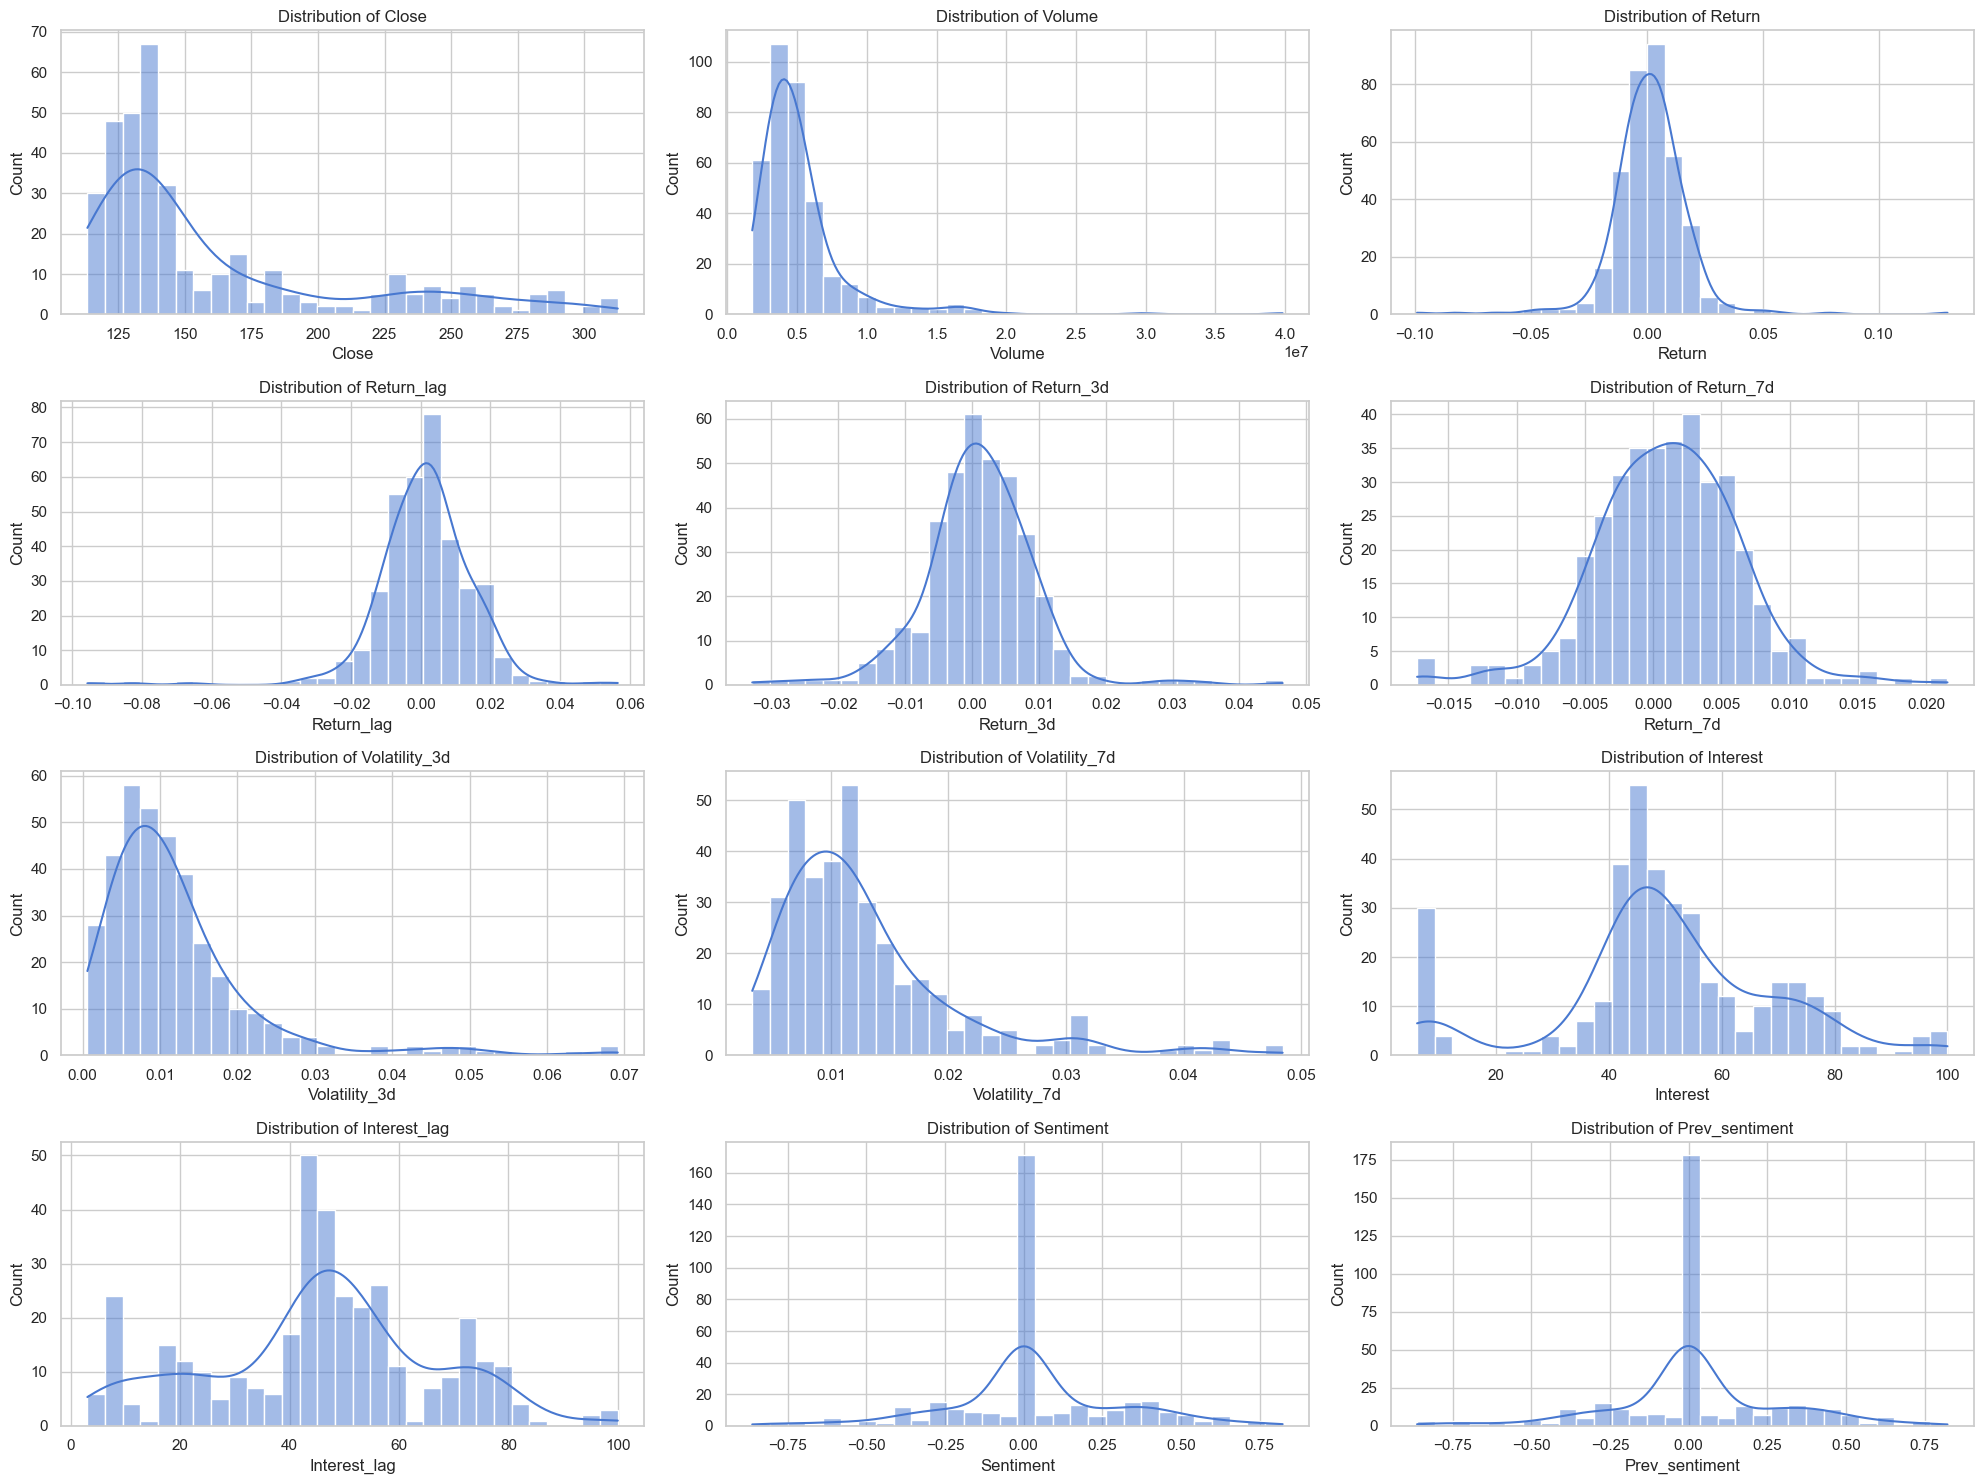

In [8]:
# Distributions of variables 

variables = ['Close', 'Volume', 'Return', 'Return_lag', 'Return_3d', 'Return_7d',
             'Volatility_3d', 'Volatility_7d', 'Interest', 'Interest_lag', 'Sentiment', 'Prev_sentiment']
plt.figure(figsize=(20,15))
for i, var in enumerate(variables, 1):
    plt.subplot(4,3,i)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()
plt.close()

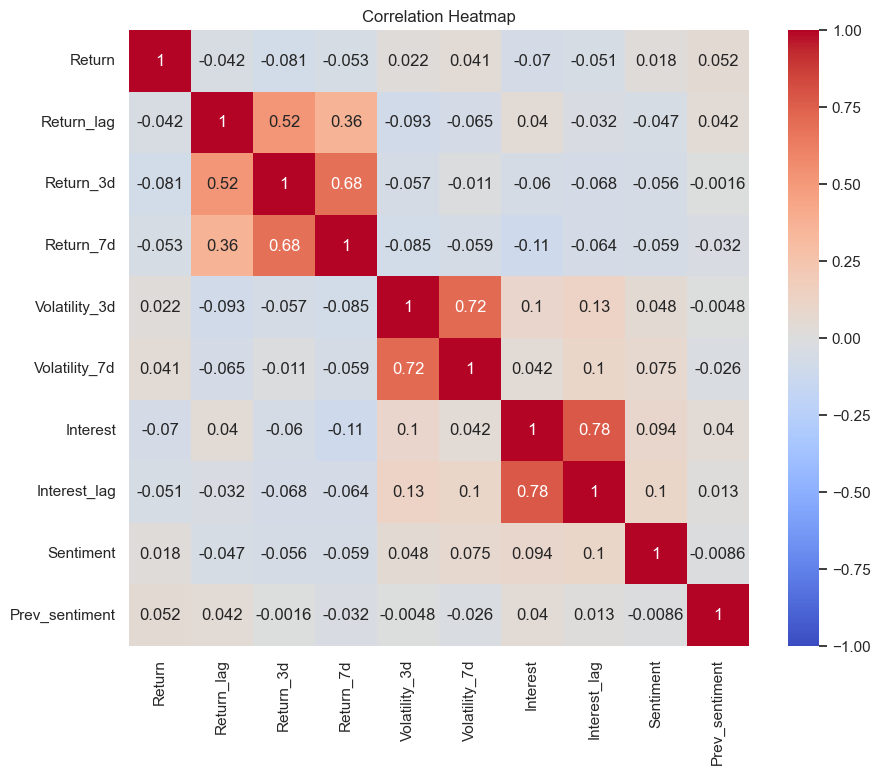

In [9]:
# Correlation heatmap

numeric_vars = ['Return', 'Return_lag', 'Return_3d', 'Return_7d',
                'Volatility_3d', 'Volatility_7d', 'Interest', 'Interest_lag', 
                'Sentiment', 'Prev_sentiment']
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_vars].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()
plt.close()

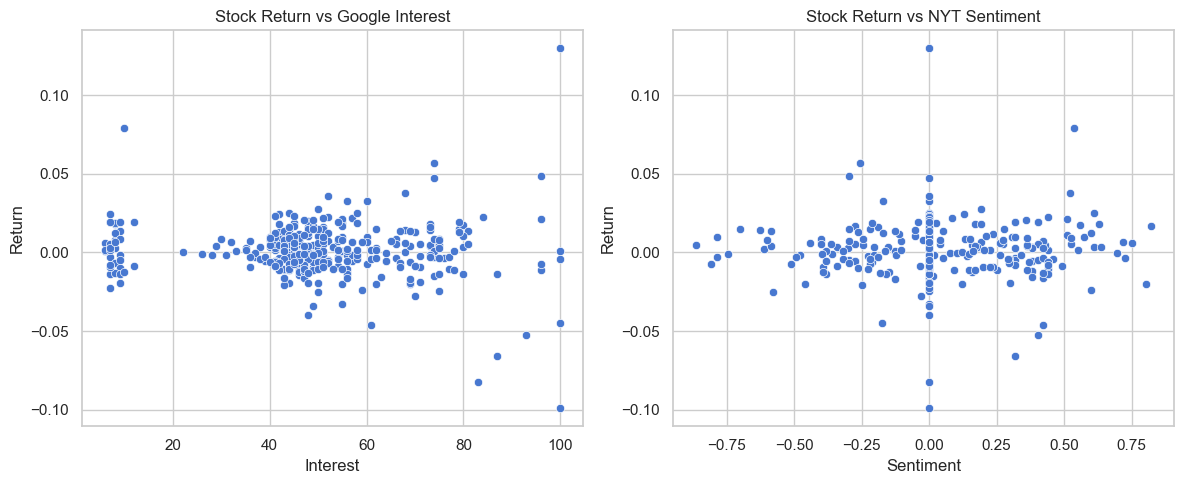

In [10]:
# Explore Interest and Sentiment Shapes

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)  # Return vs Google Interest
sns.scatterplot(x='Interest', y='Return', data=df)
plt.title('Stock Return vs Google Interest')
plt.subplot(1,2,2)  # Return vs NYT Sentiment
sns.scatterplot(x='Sentiment', y='Return', data=df)
plt.title('Stock Return vs NYT Sentiment')
plt.tight_layout()
plt.show()
plt.close()

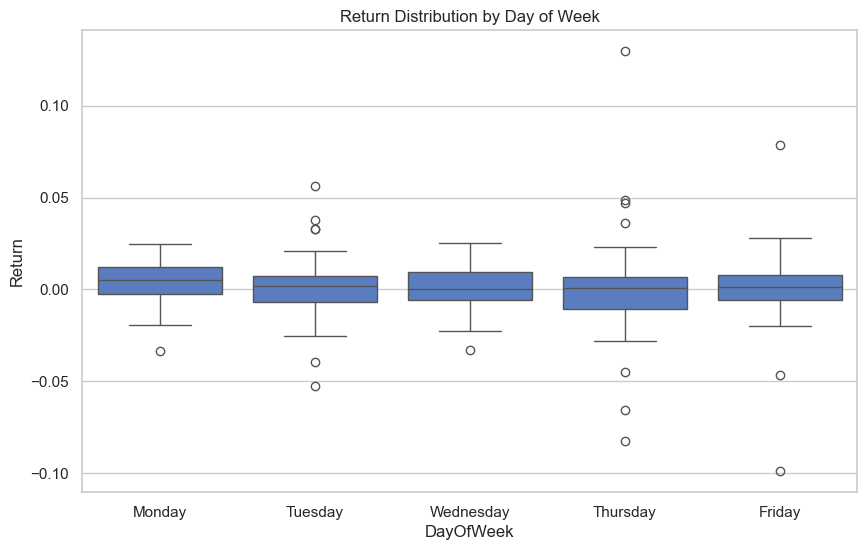

In [11]:
# Day of the Week 

plt.figure(figsize=(10,6))
sns.boxplot(x='DayOfWeek', y='Return', data=df,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.title("Return Distribution by Day of Week")
plt.show()
plt.close()

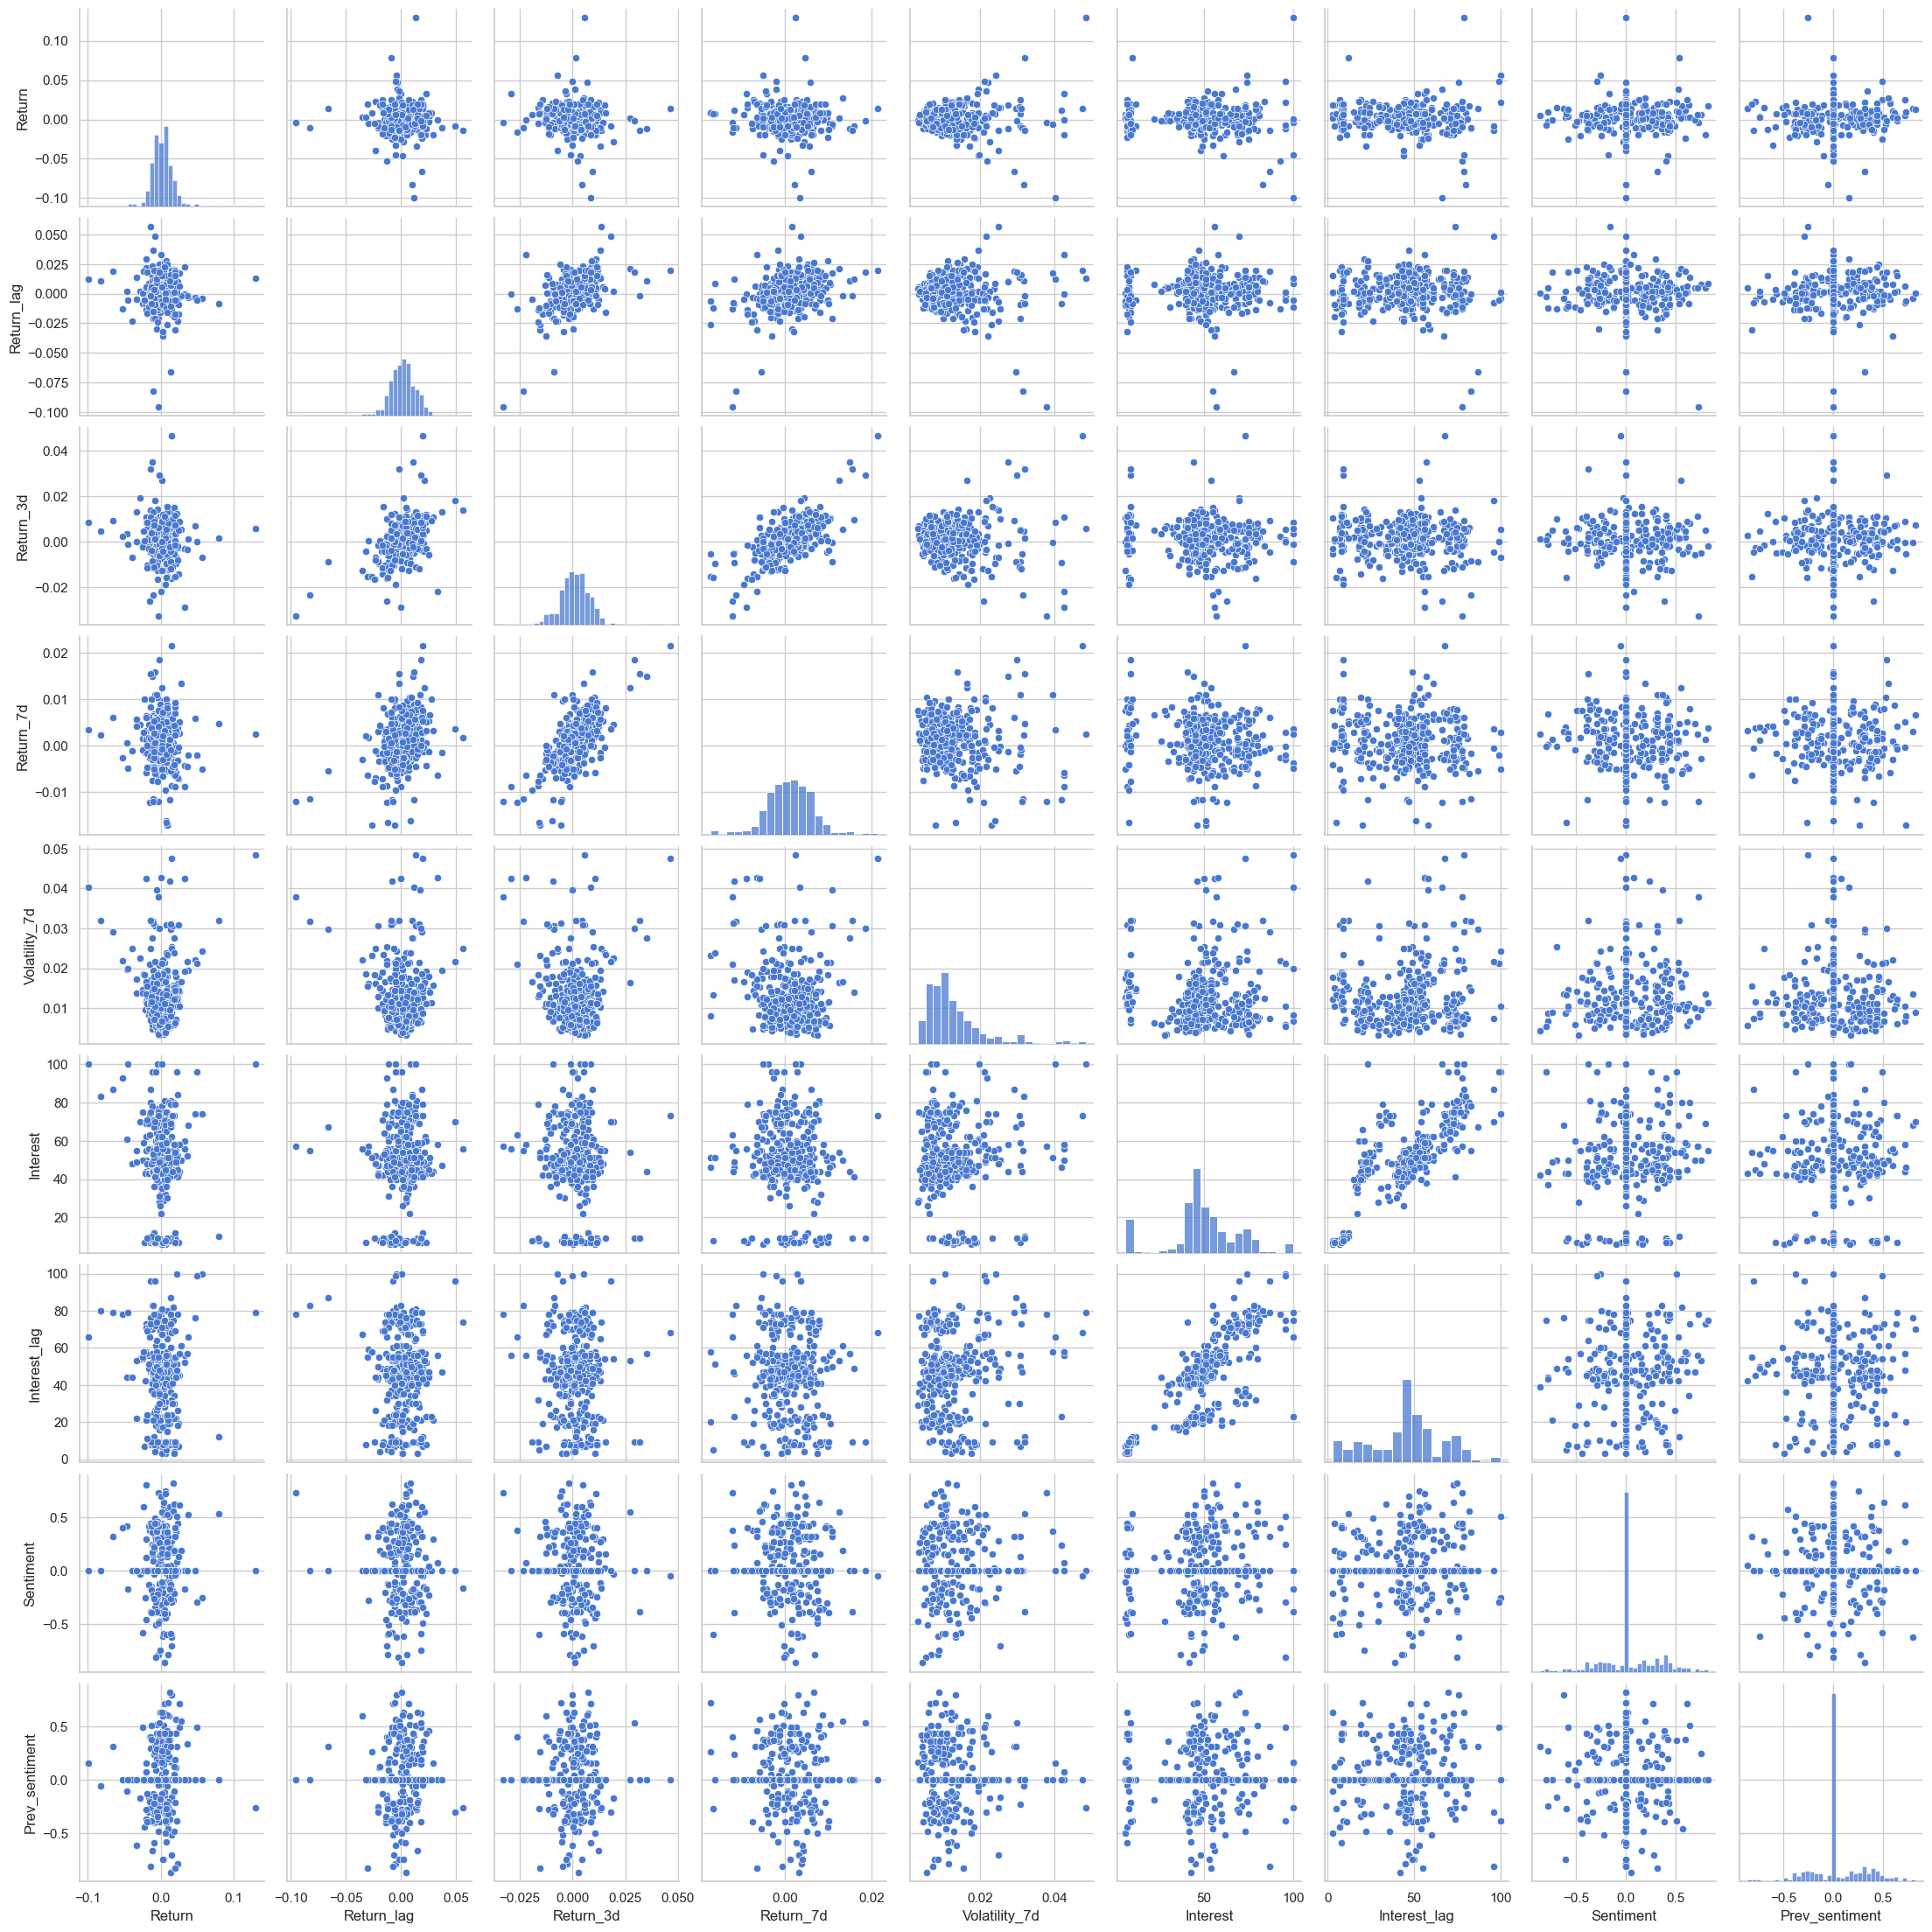

In [12]:
# Pairplot for relationships

sns.pairplot(df[['Return', 'Return_lag', 'Return_3d', 'Return_7d', 'Volatility_7d', 
                 'Interest', 'Interest_lag', 'Sentiment', 'Prev_sentiment']])
plt.show()
plt.close()

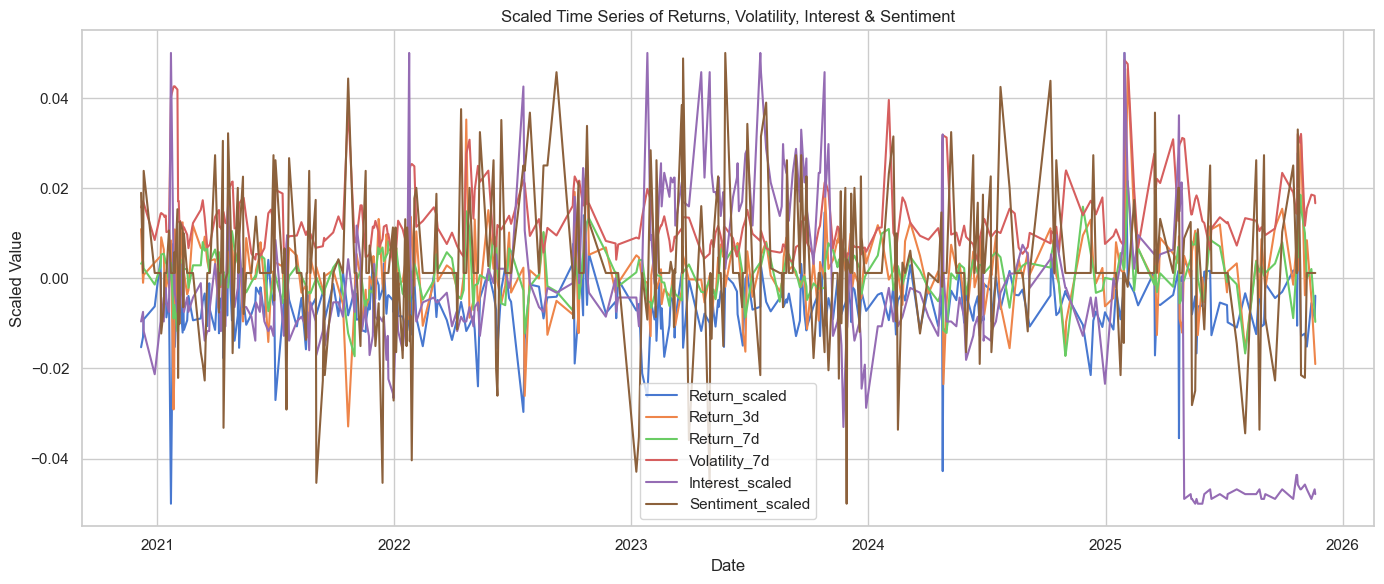

In [13]:
# Time Series

# Scale vars
def scale_series(series, new_min=-0.05, new_max=0.05):
    s_min = series.min()
    s_max = series.max()
    return (series - s_min) / (s_max - s_min) * (new_max - new_min) + new_min

df['Return_scaled'] = scale_series(df['Return'])
df['Interest_scaled'] = scale_series(df['Interest'])
df['Sentiment_scaled'] = scale_series(df['Sentiment'])

# Plot
df_to_plot = ['Return_scaled', 'Return_3d', 'Return_7d', 'Volatility_7d', 'Interest_scaled', 'Sentiment_scaled']
plt.figure(figsize=(14,6))
for col in df_to_plot:
    plt.plot(df['Date'], df.get(col, df[col]), label=col)
plt.title("Scaled Time Series of Returns, Volatility, Interest & Sentiment")
plt.xlabel("Date")
plt.ylabel("Scaled Value")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()


Feature Engineering


Modeling